In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import keras
import matplotlib.pyplot as plt

import tensorflow as tf
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['catndog']


In [2]:
N_CLASSES = 2
BATCH_SIZE = 64
W = H = 128
classes = ['cat', 'dog']

In [3]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, 
                                                               brightness_range=(0.5, 2),
                                                               height_shift_range = 0.25,
                                                               width_shift_range = 0.25,
                                                               zoom_range = 0.5,
                                                               shear_range = 0.5,
                                                               horizontal_flip=True)

In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [5]:
train_dataset = train_generator.flow_from_directory(directory='../input/catndog/catndog/train/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

test_dataset = test_generator.flow_from_directory(directory='../input/catndog/catndog/test/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 153 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


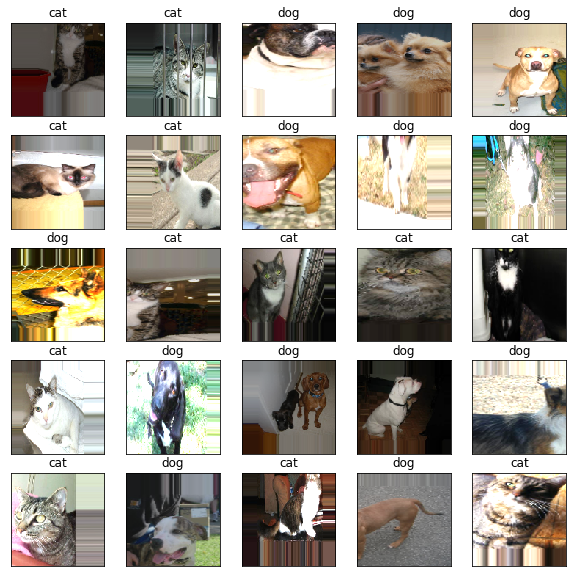

In [6]:
grids = (5,5)
counter = 0

plt.figure(figsize=(10,10))

for batch_images, batch_labels in train_dataset:
    i = np.random.randint(len(batch_images))
    i = 0
    img = batch_images[i]
    label = batch_labels[i]
    
    if(counter < grids[0]*grids[1]):
        counter += 1
    else:
        break
    
    # plot image and its label
    ax = plt.subplot(grids[0], grids[1], counter)
    ax = plt.imshow(img, cmap='brg')
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[int(label)])

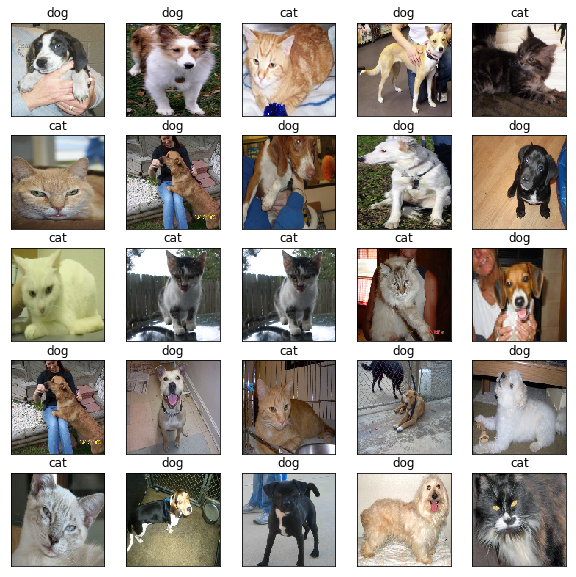

In [7]:
grids = (5,5)
counter = 0

plt.figure(figsize=(10,10))

for batch_images, batch_labels in test_dataset:
    i = np.random.randint(len(batch_images))
    i = 0
    img = batch_images[i]
    label = batch_labels[i]
    
    if(counter < grids[0]*grids[1]):
        counter += 1
    else:
        break
    
    # plot image and its label
    ax = plt.subplot(grids[0], grids[1], counter)
    ax = plt.imshow(img, cmap='brg')
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[int(label)])

In [8]:
vgg = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(H, W, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [9]:
len_vgg_layers = len(vgg.layers)
print("Total number of vgg layers: ", len_vgg_layers)

vgg_outputshape = vgg.output_shape
print("Vgg output shape from input shape (%d, %d, 3): "%(H, W), ":", vgg_outputshape)

Total number of vgg layers:  19
Vgg output shape from input shape (128, 128, 3):  : (None, 4, 4, 512)


In [10]:
# define top model
flatten = keras.layers.Flatten()(vgg.output)
fc = keras.layers.Dense(256, activation='relu')(flatten)
prob = keras.layers.Dense(1, activation='sigmoid')(fc)

In [11]:
model = keras.models.Model(vgg.input, prob)

In [12]:
model

In [13]:
for i in range(len_vgg_layers):
    model.layers[i].trainable = False

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit_generator(train_dataset, epochs=10, steps_per_epoch=30, validation_data=test_dataset, validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
30/30 [==============================] - 13s 446ms/step - loss: 0.7666 - acc: 0.6517 - val_loss: 0.3843 - val_acc: 0.8235
Epoch 2/10
30/30 [==============================] - 12s 387ms/step - loss: 0.3908 - acc: 0.8160 - val_loss: 0.2634 - val_acc: 0.8824
Epoch 3/10
30/30 [==============================] - 11s 357ms/step - loss: 0.3172 - acc: 0.8798 - val_loss: 0.2976 - val_acc: 0.8824
Epoch 4/10
30/30 [==============================] - 11s 359ms/step - loss: 0.2794 - acc: 0.8864 - val_loss: 0.2708 - val_acc: 0.8824
Epoch 5/10
30/30 [==============================] - 11s 358ms/step - loss: 0.2655 - acc: 0.8908 - val_loss: 0.2959 - val_acc: 0.9059
Epoch 6/10
30/30 [==============================] - 11s 359ms/step - loss: 0.2532 - acc: 0.8932 - val_loss: 0.3592 - val_acc: 0.8471
Epoch 7/10
30/30 [==============================] - 11s 357ms/step - loss: 0.2478 - acc: 0.8992 - val_loss: 0.2712 - val_acc: 0.8706
Epoch 8/10
30/30 [===

In [17]:
test_sample_images, test_sample_labels = next(test_dataset)

In [18]:
# make prediction
predict_sample_labels = (model.predict_on_batch(test_sample_images) > 0.5).astype(int)

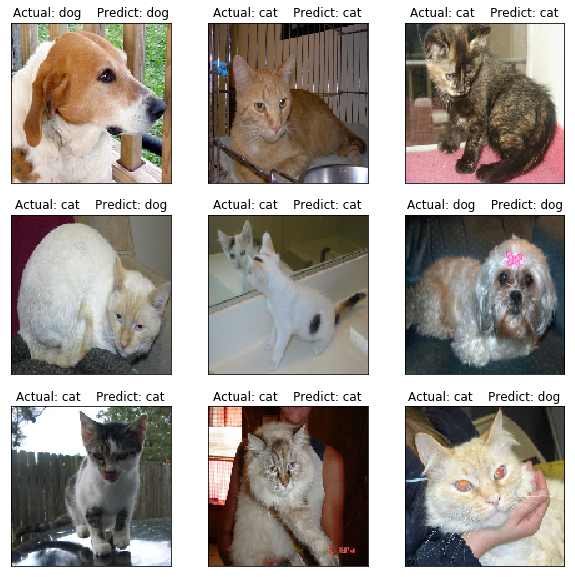

In [19]:
grids = (3,3)
counter = 0

plt.figure(figsize=(10,10))

for img, gt_label, predict_label in zip(test_sample_images, test_sample_labels, predict_sample_labels):
    
    if(counter < grids[0]*grids[1]):
        counter += 1
    else:
        break
    
    # plot image and its label
    ax = plt.subplot(grids[0], grids[1], counter)
    ax = plt.imshow(img, cmap='brg')
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual: %s    Predict: %s"%(classes[int(gt_label)], classes[int(predict_label)]))